Compare the difference.<br>

In [142]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)

In [143]:
def generate_oe_matrix(variance_threshold_L = 0.7, variance_threshold_U = 0.8):
    """Generates a random 5x5 symmetric matrix with positive values and
       the first PC explaining at least L% and at most U% of the variance.
    """

    while True:
        # Create a nxn array with random positive values
        matrix = np.abs(np.random.randn(6, 6) * 10)  # Use absolute values for positive entries
        # Make the array symmetric
        matrix = matrix + matrix.T
        
        origin_matrix = matrix

        # Subtract the mean of each row to center the data
        matrix = matrix - matrix.mean(axis=1, keepdims=True)

        # SVD 
        n = len(matrix[0])
        matrix_t = np.transpose(matrix)
        y = matrix_t / np.sqrt(n)
        U, S, Vh = np.linalg.svd(y, full_matrices=True)
        eigenvalues = S * S
        EV1_explained_variance = eigenvalues[0] / np.sum(eigenvalues) 

        # Check if the first PC explains at least the desired variance
        if EV1_explained_variance >= variance_threshold_L and EV1_explained_variance < variance_threshold_U:
            print(EV1_explained_variance, '\n')
            print(origin_matrix, '\n')
            return origin_matrix

# Generate a matrix that meets the conditions
oe = generate_oe_matrix()
corr_oe = np.corrcoef(oe)
# Subtract the mean of each row to center the data
oe_zero = oe - oe.mean(axis=1, keepdims=True)
corr_oe_zero = corr_oe - corr_oe.mean(axis=1, keepdims=True)

0.799225186840526 

[[ 7.56 18.6   6.16 15.48 15.09 11.5 ]
 [18.6  38.87 18.95 29.45  9.21 36.86]
 [ 6.16 18.95  8.97 19.68 17.21 17.52]
 [15.48 29.45 19.68  8.95  9.06 23.16]
 [15.09  9.21 17.21  9.06 16.11  8.67]
 [11.5  36.86 17.52 23.16  8.67 29.84]] 



### PCA
#### MOSAIC perform PCA on O/E matrix <br>

In [144]:
n = len(oe_zero[0])
x_t = np.transpose(oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [145]:
print('explained_variances')
print(explained_variances, '\n')
print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
print((V_Cx > 0) == (Vh > 0), '\n')

explained_variances
[0.8  0.15 0.05 0.01 0.   0.  ] 

The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True False  True]] 



In [146]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n')

corr_oe
[[ 1.    0.41  0.89  0.08 -0.62  0.5 ]
 [ 0.41  1.    0.49  0.69 -0.9   0.97]
 [ 0.89  0.49  1.    0.03 -0.72  0.56]
 [ 0.08  0.69  0.03  1.   -0.35  0.77]
 [-0.62 -0.9  -0.72 -0.35  1.   -0.83]
 [ 0.5   0.97  0.56  0.77 -0.83  1.  ]] 

V_Cx[0]
[ 34.92 168.54  45.96  91.09 -50.34 159.11] 

Vh[0]
[ 0.13  0.65  0.18  0.35 -0.19  0.61] 

cov_x
[[ 19.73  19.2   20.51   2.67  -9.97  21.91]
 [ 19.2  113.17  27.37  54.59 -34.76 101.75]
 [ 20.51  27.37  27.17   1.28 -13.69  28.86]
 [  2.67  54.59   1.28  54.64  -9.5   56.1 ]
 [ -9.97 -34.76 -13.69  -9.5   13.22 -29.85]
 [ 21.91 101.75  28.86  56.1  -29.85  98.06]] 

cov_x_sum
[93.9905835946451, 350.8360619692678, 118.87810232018086, 178.77918344085828, 110.98451023134436, 336.5219731275064] 



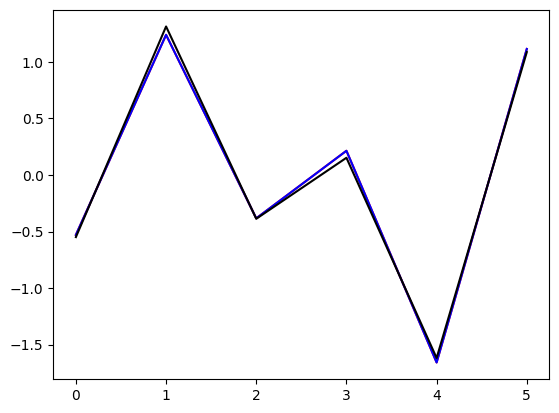

In [147]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [148]:
plt.clf()

<Figure size 640x480 with 0 Axes>

#### HOMER perform PCA on correlation matrix <br>

In [149]:
n = len(corr_oe_zero[0])
x_t = np.transpose(corr_oe_zero)
y = x_t / np.sqrt(n)

U, S, Vh = np.linalg.svd(y, full_matrices=True)
eigenvalues = S * S
sum_eigenvalues = np.sum(eigenvalues)
explained_variances = eigenvalues / sum_eigenvalues
cov_x = np.matmul(np.transpose(y), y)
V_Cx = np.matmul(Vh, cov_x)

In [150]:
# print('explained_variances')
# print(explained_variances, '\n')
# print("The sign of the V_Cx for all rows with lambda > 0 is same as the Principal components")
# print((V_Cx > 0) == (Vh > 0), '\n')


print(V_Cx, '\n')
print(V_Cx > 0, '\n')
print(Vh, '\n')
print(Vh > 0, '\n')

[[-0.58 -0.81 -0.65 -0.42  0.85 -0.79]
 [ 0.18 -0.1   0.17 -0.21 -0.02 -0.09]
 [ 0.01 -0.    0.    0.01  0.01  0.  ]
 [ 0.    0.   -0.   -0.   -0.   -0.  ]
 [ 0.    0.   -0.   -0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.    0.  ]] 

[[False False False False  True False]
 [ True False  True False False False]
 [ True False  True  True  True  True]
 [ True  True False False False False]
 [ True  True False False  True  True]
 [ True  True  True  True False  True]] 

[[-0.34 -0.47 -0.38 -0.24  0.5  -0.46]
 [ 0.5  -0.28  0.5  -0.6  -0.06 -0.25]
 [ 0.58 -0.29  0.03  0.6   0.46  0.02]
 [ 0.52  0.14 -0.76 -0.17 -0.3  -0.14]
 [ 0.09  0.16 -0.14 -0.44  0.53  0.68]
 [ 0.08  0.76  0.13 -0.02  0.41 -0.49]] 

[[False False False False  True False]
 [ True False  True False False False]
 [ True False  True  True  True  True]
 [ True  True False False False False]
 [ True  True False False  True  True]
 [ True  True  True False  True False]] 



In [151]:
print('corr_oe')
print(np.corrcoef(oe), '\n')
print('V_Cx[0]')
print(V_Cx[0], '\n')
print('Vh[0]')
print(Vh[0], '\n')
print('cov_x')
print(cov_x, '\n')

cov_x_sum = [np.sum(np.abs(row)) for row in cov_x]
print('cov_x_sum')
print(cov_x_sum, '\n') 

corr_oe
[[ 1.    0.41  0.89  0.08 -0.62  0.5 ]
 [ 0.41  1.    0.49  0.69 -0.9   0.97]
 [ 0.89  0.49  1.    0.03 -0.72  0.56]
 [ 0.08  0.69  0.03  1.   -0.35  0.77]
 [-0.62 -0.9  -0.72 -0.35  1.   -0.83]
 [ 0.5   0.97  0.56  0.77 -0.83  1.  ]] 

V_Cx[0]
[-0.58 -0.81 -0.65 -0.42  0.85 -0.79] 

Vh[0]
[-0.34 -0.47 -0.38 -0.24  0.5  -0.46] 

cov_x
[[ 0.29  0.22  0.31  0.04 -0.3   0.22]
 [ 0.22  0.41  0.26  0.25 -0.4   0.4 ]
 [ 0.31  0.26  0.34  0.06 -0.33  0.26]
 [ 0.04  0.25  0.06  0.23 -0.19  0.24]
 [-0.3  -0.4  -0.33 -0.19  0.42 -0.39]
 [ 0.22  0.4   0.26  0.24 -0.39  0.38]] 

cov_x_sum
[1.3818278306141005, 1.9360553603058643, 1.553344939215889, 1.0106989198644123, 2.0258852652833226, 1.8918615115911481] 



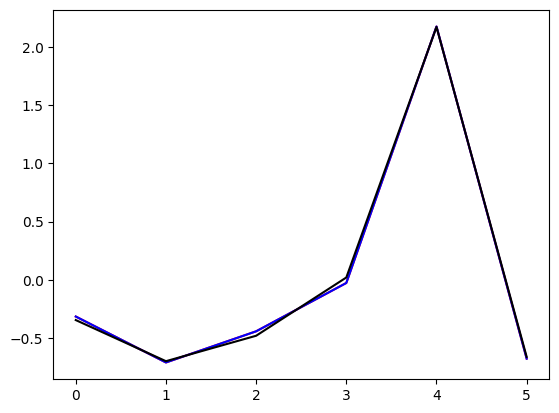

In [152]:
cov_x_sum = list(enumerate(cov_x_sum)) 
sorted_list = sorted(cov_x_sum, key=lambda x: x[1], reverse=True) 
cov_x_selected = cov_x[sorted_list[0][0]]

if np.corrcoef(cov_x_selected, Vh[0])[0][1] < 0:
    cov_x_selected = -cov_x_selected

Vh0_Norm = (Vh[0] - np.mean(Vh[0])) / np.std(Vh[0])
cov_x_selected_Norm = (cov_x_selected - np.mean(cov_x_selected)) / np.std(cov_x_selected)
V_Cx0_Norm = (V_Cx[0] - np.mean(V_Cx[0])) / np.std(V_Cx[0])

plt.plot(Vh0_Norm, c="red")
plt.plot(V_Cx0_Norm, c="blue")
plt.plot(cov_x_selected_Norm, c="black")

In [153]:
plt.clf()

<Figure size 640x480 with 0 Axes>

### Check the plot without Normalization on the Pearson correlation matrix

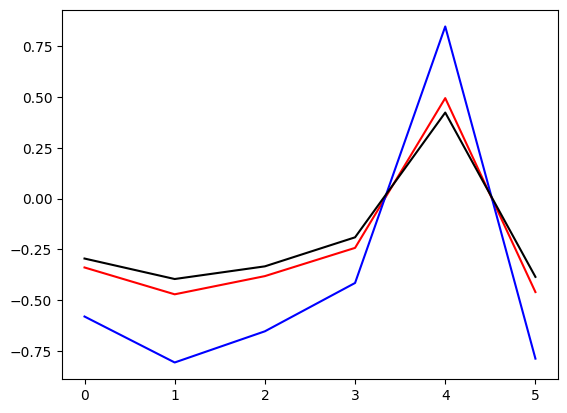

In [154]:
plt.plot(Vh[0], c="red")
plt.plot(V_Cx[0], c="blue")
plt.plot(cov_x_selected, c="black")

In [155]:
plt.clf()

<Figure size 640x480 with 0 Axes>